In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv("House_Rent_Dataset.csv")

In [4]:
dataset.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


✅ Key tasks in Feature Engineering:
1.Dropping Unnecessary Columns (Irrelevant Features)

Remove columns that don’t help in prediction (e.g., ID numbers, duplicate info).

Example: Dropping Customer_ID when predicting churn.

-------------------
2.Handling Missing Values

Fill missing values (imputation) or drop rows/columns.

Example: Fill Age missing values with the median.

----------------------
3.Encoding Categorical Variables

Convert text labels into numerical form:

One-Hot Encoding (for nominal categories: Red, Blue, Green).

Label Encoding (for ordinal categories: Low, Medium, High).

---------------------

4.Scaling/Normalization

Standardize numerical features so they are on the same scale.

Example: Use StandardScaler or MinMaxScaler.

----------------------

5.Feature Creation (Deriving New Features)

Combine or transform existing features to create new ones.

Example: From Date_of_Birth, create Age.

--------------------

6.Binning or Bucketing

Convert continuous values into categories.

Example: Convert Age into bins: Teen, Adult, Senior.

---------------------

7.Feature Selection

Keep only the most important features (using correlation, feature importance, PCA, etc.).

-----------------------

8.Handling Outliers

Detect and remove/transform extreme values.

-----------------------

9.Text/NLP Feature Engineering

Convert text into numerical features (TF-IDF, word embeddings).

--------------------------

10.Domain-Specific Features

Create features based on problem knowledge.

Example: For loan default prediction, create Debt-to-Income Ratio.


-----------------------
🔑 In simple terms:
Feature engineering = Drop useless + Fix + Transform + Create + Select best features.


In [5]:
dataset.drop(['Posted On','Floor','Area Locality','Point of Contact'], axis=1, inplace=True)

In [6]:
dataset


,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2


In [7]:
dataset['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [10]:
dataset['City'].unique()



array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [11]:
dataset['Furnishing Status'].unique()


array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [12]:
dataset['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [13]:
categorical_object_type_column = ['Area Type','City','Furnishing Status','Tenant Preferred']

Object defining of OrdinalEncoder  for convert categorical to numeical 

In [14]:
encode = OrdinalEncoder()

In [15]:
dataset[categorical_object_type_column] = encode.fit_transform(dataset[categorical_object_type_column])

In [16]:
dataset

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,2.0,4.0,2.0,1.0,2
1,2,20000,800,2.0,4.0,1.0,1.0,1
2,2,17000,1000,2.0,4.0,1.0,1.0,1
3,2,10000,800,2.0,4.0,2.0,1.0,1
4,2,7500,850,1.0,4.0,2.0,0.0,1
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,1.0,3.0,1.0,1.0,2
4742,3,29000,2000,2.0,3.0,1.0,1.0,3
4743,3,35000,1750,1.0,3.0,1.0,1.0,3
4744,3,45000,1500,1.0,3.0,1.0,2.0,2


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   int64  
 1   Rent               4746 non-null   int64  
 2   Size               4746 non-null   int64  
 3   Area Type          4746 non-null   float64
 4   City               4746 non-null   float64
 5   Furnishing Status  4746 non-null   float64
 6   Tenant Preferred   4746 non-null   float64
 7   Bathroom           4746 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 296.8 KB


Defining Dependent and Independent Variables  or we can say definig target and feature variable.

In [21]:
X = dataset.drop('Rent', axis=1) # Independent Variable / feature variable
Y = dataset['Rent'] # Dependent Variable / target variable

Spliting Data Into two Parts Train Dataset and Test Dataset

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

Data Modeling -> Liner regression for numerical prediction


In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [24]:
# model predict on x_test data
model_predict = model.predict(x_test)

In [25]:
#Accuracy Score here r2 
from sklearn.metrics import r2_score

In [26]:
print("R2 Score:", r2_score(y_test, model_predict))

R2 Score: 0.4401346743379898


Random Forest regression

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
model2 = RandomForestRegressor()

In [29]:
model2.fit(x_train, y_train)

RandomForestRegressor()

In [32]:
model2_predict = model2.predict(x_test)

In [33]:
print("R2 Score:",r2_score(y_test, model2_predict))

R2 Score: 0.07151419063396747


decision tree Regression algorithm

In [34]:
#decision tree Regression algorithm
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train)
model3_predict = model3.predict(x_test)
print("R2 Score:",r2_score(y_test, model3_predict))



R2 Score: 0.5217915567511653


 svr(support vector regression)

In [35]:
# svr(support vector regression)
from sklearn.svm import SVR
model4 = SVR(kernel='rbf')
model4.fit(x_train, y_train)
model4_predict = model4.predict(x_test)
print("R2 Score:", r2_score(y_test, model4_predict))

R2 Score: -0.08219949394454185


polynomial regression

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

R2 Score: 0.6554060626318663
Mean Absolute Error: 18397.09238725927
Mean Squared Error: 1373338239.9981086


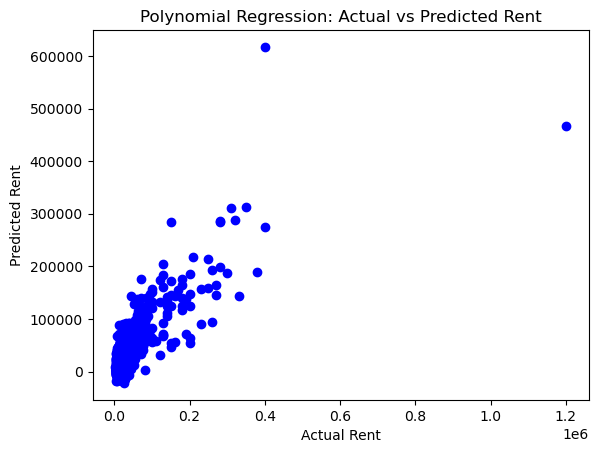

In [37]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
# 5️⃣ Train Polynomial Regression (Linear Regression on poly features)
from sklearn.linear_model import LinearRegression
model5 = LinearRegression()
model5.fit(x_train_poly, y_train)
# 6️⃣ Predict on x_test_poly
model5_predict = model5.predict(x_test_poly)

# 7️⃣ Evaluate the model
print("R2 Score:", r2_score(y_test, model5_predict))
# 8️⃣ Calculate and print MAE and MSE
print("Mean Absolute Error:", mean_absolute_error(y_test, model5_predict))
print("Mean Squared Error:", mean_squared_error(y_test, model5_predict))

# 9️⃣ Visualize the results
plt.scatter(y_test, model5_predict, color='blue')
plt.xlabel('Actual Rent')
plt.ylabel('Predicted Rent')
plt.title('Polynomial Regression: Actual vs Predicted Rent')
plt.show()
# --- IGNORE ---


